# Project Title: Investigate Universities dataset

## Table of Contents
<ul>
<li>Introduction</li>
<li>Data Wrangling</li>
<li>Exploratory Data Analysis</li>
<li>Conclusions</li>
</ul>

# Introduction

> **university** rankings are rankings of institutions in higher education based on combinations of various factors. None of the rankings give a comprehensive overview of the strengths of the institutions because all select a range of quantifiable characteristics to base their results on. In this project all data analysis process will perform to get an insight from historical data to make a better decisions.

## Data Wrangling
### This is the process of gathering, accessing and cleaning noise data.
**Data Gathering:** process of collecting/downloading data from different sources
> Data gathering can happen in a number of ways:
>> 1. Downloading files that are readily available
>> 2. Getting data from an API or web scrapping
>> 3. Pulling data from existing databases

### This data consists of different universities records with their respective rankings according national ranking system.

<ul>
<li>Word_rank: Ranking of each university</li>
<li>University: University Name</li>
<li>National_rank: ranks of each nation</li>
<li>Total_score</li>
<li>Alumni</li>
<li>Award: university awards per years</li>
<li>Pub: Total number of publication per year</li>
<li>Year: university established year</li>
</ul>

### **Assessing and Building Intuition**
Once you have your data loaded into dataframes, Pandas makes a quick investigation of the data really easy.
Let's explore some helpful methods for assessing and building intuition about a dataset. 
We can use the cancer data from before to help us.

In [3]:
# import all the python packages required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline

In [4]:
# Load your data and print out a few lines.
df = pd.read_csv(r'C:\Users\Ridwan\Desktop\shanghaiData.csv')
df.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


In [4]:
# check data types of each variables
df.dtypes

world_rank          object
university_name     object
national_rank       object
total_score        float64
alumni             float64
award              float64
hici               float64
ns                 float64
pub                float64
pcp                float64
year                 int64
dtype: object

In [5]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.shape

(4897, 11)

In [6]:
# this returns the number of unique values in each column
df.nunique()

world_rank         119
university_name    658
national_rank      245
total_score        337
alumni             369
award              291
hici               454
ns                 548
pub                621
pcp                421
year                11
dtype: int64

In [26]:
# Checking the total number of missing values.
# as shown below that total score variable has many null values 
df.isnull().sum()

world_rank            0
university_name       1
national_rank         1
total_score        3796
alumni                1
award                 2
hici                  2
ns                   22
pub                   2
pcp                   2
year                  0
dtype: int64

In [27]:
# calaculate the percentage of missing values in dataset
# Replace features having percentage greater 10% with mean compuatation
df.isnull().mean()*100

world_rank          0.000000
university_name     0.020421
national_rank       0.020421
total_score        77.516847
alumni              0.020421
award               0.040841
hici                0.040841
ns                  0.449255
pub                 0.040841
pcp                 0.040841
year                0.000000
dtype: float64

In [28]:
df.describe()

,total_score,alumni,award,hici,ns,pub,pcp,year
count,1101.000000,4896.000000,4895.00000,4895.000000,4875.000000,4895.000000,4895.000000,4897.000000
mean,36.383470,9.161724,7.69191,16.221491,16.078503,38.254648,21.242329,2009.658566
std,13.557186,14.140636,15.49411,14.382710,12.511529,13.050809,9.254351,3.197576
min,23.500000,0.000000,0.00000,0.000000,0.000000,7.300000,8.300000,2005.000000
25%,27.400000,0.000000,0.00000,7.300000,8.000000,28.900000,15.600000,2007.000000
50%,31.300000,0.000000,0.00000,12.600000,12.800000,36.000000,19.000000,2009.000000
75%,41.800000,15.600000,13.40000,21.700000,19.800000,45.300000,24.500000,2012.000000
max,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,2015.000000


### Data Cleaning is the process of elimating noise values from dataset
#### Data Cleaning step might include all the follwing ways:
<ul>
    <li>Outliers</li>
    <li>Incorrect data types</li>
    <li>Missing data</li>
    <li>Duplicates</li>
    <li>Structural problems, such as different column names</li>
    <li>Mismatch number of records</li>
</ul>

Removing an outliers from dataset, wait before removing an outliers. <br>
what is the meaning of an outliers? <br>
**An outliers** is numerical values that are deviated from other values.

In [7]:
def RemoveOutliers(df):
    # compute zscore value and find asbolute value of it 
    zsc = np.abs(zscore(df.select_dtypes(include=[np.number])))
    remove_outliers = df[zsc <=3 ]  # remove all the values having standard deviation greater than 3
    return remove_outliers 
    
# Calling the function here   
df = RemoveOutliers(df)

Checking all the duplicates data in the datasets <br>
as we can see that dataset does not have duplicate values <br>

In [8]:
df.duplicated().sum()

0

Next step in data cleaning is filling or removing missing values <br>
Filling missing values having null percentages greater than 10% <br>
filling missing values can be handle with mean, mode

In [9]:
def ModeImputation(df,features):
    df[features].fillna(df[features].isnull().mode()[0],inplace=True)
    
ModeImputation(df,'total_score')

In [10]:
# remove missing values from featues having total percentage of missing less than 10%
df = df.dropna(how='any',axis=0,inplace=False)

In [11]:
df.isnull().sum()

world_rank         0
university_name    0
national_rank      0
total_score        0
alumni             0
award              0
hici               0
ns                 0
pub                0
pcp                0
year               0
dtype: int64

Next steps in data cleaning is to convert incorrect data to valid data types.<br>
as you can see that year is in int data type whuch need to be in year format

In [25]:
df['year'] = pd.to_datetime(df.year)

## Exploratory Data Analysis

> Now that the data has trimmed and cleaned,the next thing to do is analysis step. Compute statistics and create visualizations with the goal of addressing the research questions.<br><br>
> **Research Questions**
> <ol>
    <li>Top 5 universities highest national rank</li>
    <li>Year top 5 universities  had highest alumni</li>
    <li>Top 5 university having highest publication</li> 
  </ol>  

### As we can see in the graph below that shows top 5 universities total total score in each year
> <ol>
    <li> Massachusetts Institute of Technology (MIT) </li>
    <li> University of California, Berkeley </li>
    <li> Standford University</li>
    <li>University of Cambridge</li>
    <li>Harvard University</li>
</ol>

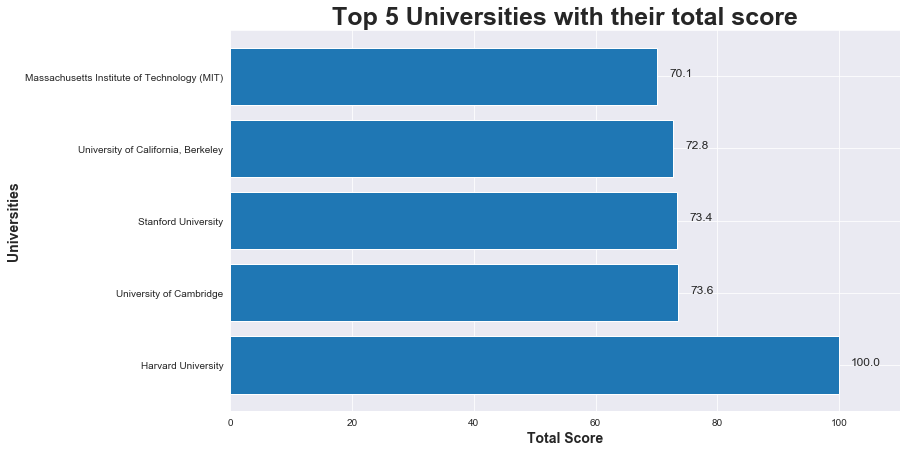

In [39]:
def BarhGraphAnnotation(variable1,variable2):
    for i, count in enumerate(variable1):
        plt.annotate(count,(count+2,variable2[i]),size=12,weight='light')
    return ''

sns.set_style('darkgrid')
plt.figure(figsize=(12,7))

BarhGraphAnnotation(df['total_score'].head(),df['university_name'].head())

plt.barh(y=df['university_name'].head(),width=df['total_score'].head(),data=df,animated=True)
plt.xlim(0,110)
plt.title('Top 5 Universities with their total score',fontdict={'family':'Arial','weight':'bold','size':25})
plt.ylabel("Universities",fontdict={'family':'Arial','weight':'bold','size':14})
plt.xlabel("Total Score",fontdict={'family':'Arial','weight':'bold','size':14})
    
plt.show()

### As we can see in the graph below that shows top 5 universities total award win each year
> <ol>
    <li> Massachusetts Institute of Technology (MIT) </li>
    <li> University of California, Berkeley </li>
    <li> Standford University</li>
    <li>University of Cambridge</li>
    <li>Harvard University</li>
</ol>

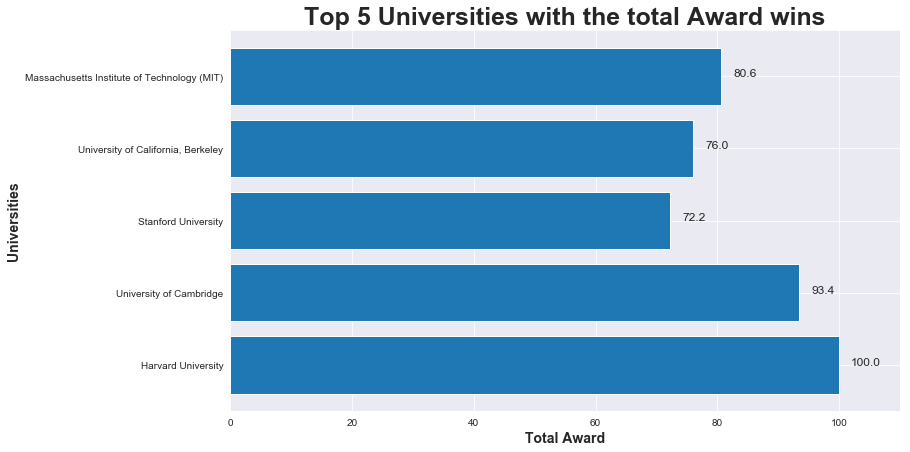

In [38]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,7))

BarhGraphAnnotation(df['award'].head(),df['university_name'].head())

plt.barh(y=df['university_name'].head(),width=df['award'].head(),data=df,animated=True)
plt.xlim(0,110)
plt.title('Top 5 Universities with the total Award wins',fontdict={'family':'Arial','weight':'bold','size':25})
plt.ylabel("Universities",fontdict={'family':'Arial','weight':'bold','size':14})
plt.xlabel("Total Award",fontdict={'family':'Arial','weight':'bold','size':14})
    
plt.show()

### As we can see in the graph below that shows top 5 universities total alumni in each year
> <ol>
    <li>Harvard University</li>
    <li> University of California, Berkeley </li>
    <li> Standford University</li>
    <li>University of Cambridge</li>
    <li>Massachusetts Institute of Technology (MIT)</li>
</ol>

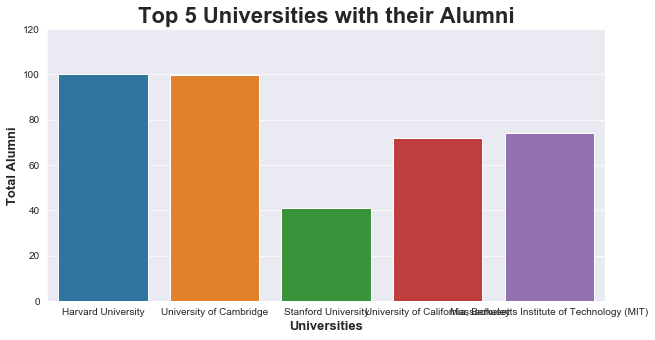

In [35]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['university_name'].head(),y=df['alumni'].head(),data=df)

plt.title('Top 5 Universities with their Alumni',fontdict={'family':'Arial','weight':'bold','size':22})
plt.xlabel("Universities",fontdict={'family':'Arial','weight':'bold','size':13})
plt.ylabel("Total Alumni",fontdict={'family':'Arial','weight':'bold','size':13})
plt.ylim(0,120)
    
plt.show()

### As we can see in the graph below that shows top 5 universities total publication in each year
> <ol>
    <li>Harvard University</li>
    <li> University of California, Berkeley </li>
    <li> Standford University</li>
    <li>University of Cambridge</li>
    <li>Massachusetts Institute of Technology (MIT)</li>
</ol>

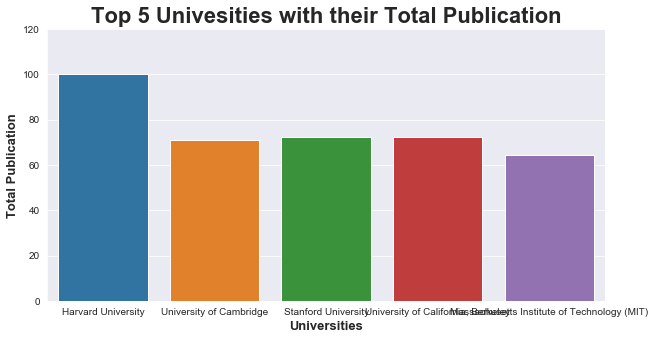

In [33]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df['university_name'].head(),y=df['pub'].head(),data=df)

plt.title('Top 5 Univesities with their Total Publication',fontdict={'family':'Arial','weight':'bold','size':22})
plt.xlabel("Universities",fontdict={'family':'Arial','weight':'bold','size':13})
plt.ylabel("Total Publication",fontdict={'family':'Arial','weight':'bold','size':13})
plt.ylim(0,120)
    
plt.show()

**Next thing to do is to check correlation, Correlation shows the relationship between bivariate variable.
this means if one variable values increased other will increase too and likewise.
correlation value can be postive, negative or neautral.the values start from 0 to 1
1 shows the strongest correlation.**

**As we can see in the heatmap whicn shows the relationship between those variables**
> <ol>
    <li>total score is linearly dependent on alumni</li>
    <li> total score is linearly dependent on award win</li>
  </ol>



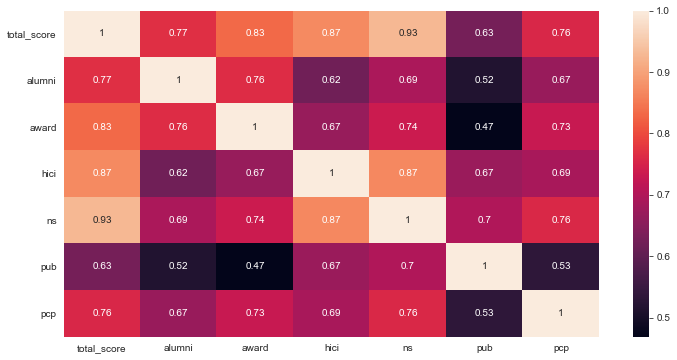

In [46]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
corr = df.corr()
sns.heatmap(corr,annot=corr);

<big>**Conclusion**</big>
><ol>
  <li>Harvard University is the best university in the world because of their standard and perform </li>
   <li>For any university to be in the top, it has to work hard on those ranking features 
 </ol>